In [1]:
import pydot
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
data_df = pd.read_csv('./data/temps.csv')
data_df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECBD6EC588>,
      dtype=object)

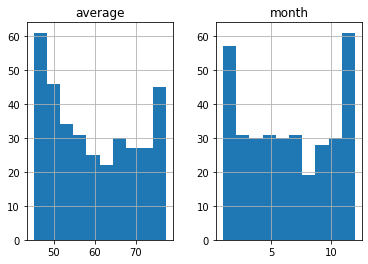

In [3]:
data_df[['month', 'average']].hist()

In [4]:
data_df.shape

(348, 12)

In [5]:
data_df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [6]:
actual_temps = data_df['actual']
average_temps =  data_df['average']


years = data_df['year']
months = data_df['month']
days = data_df['day']
dates = [datetime.strptime([str(f'{years[i]}/{months[i]}/{days[i]}') for i in range(data_df.shape[0])][n], '%Y/%m/%d') for n in range(data_df.shape[0])]

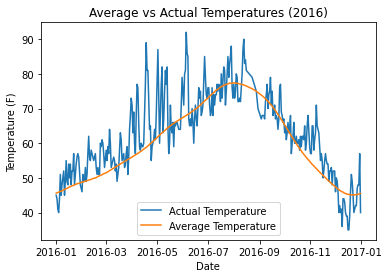

In [7]:
fig, ax = plt.subplots()
date_acctemp = sns.lineplot(dates, actual_temps, ax=ax)
date_avgtemp = sns.lineplot(dates, average_temps, ax=ax)
date_avgtemp.set(xlabel='Date', ylabel='Temperature (F)', title='Average vs Actual Temperatures (2016)')
ax.legend(('Actual Temperature', 'Average Temperature'))
plt.show()

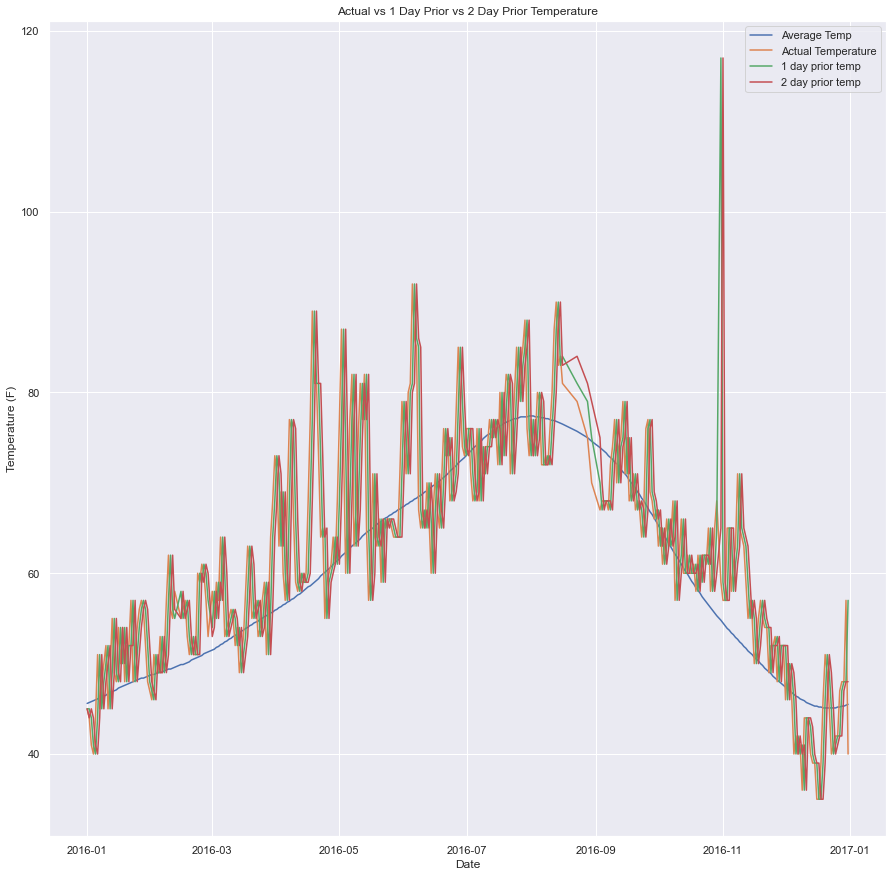

In [8]:
fig.clear()
ax.clear()

sns.set(rc={'figure.figsize': (15, 15)})

prior_2 = data_df['temp_2']
prior_1 = data_df['temp_1']

fig, ax = plt.subplots()
date_avgtemp = sns.lineplot(dates, average_temps, ax=ax)
date_acctemp = sns.lineplot(dates, actual_temps, ax=ax)
date_prior1 = sns.lineplot(dates, prior_1, ax=ax)
date_prior2 = sns.lineplot(dates, prior_2, ax=ax)
date_prior2.set(xlabel='Date', ylabel='Temperature (F)', title='Actual vs 1 Day Prior vs 2 Day Prior Temperature')
ax.legend(('Average Temp', 'Actual Temperature', '1 day prior temp', '2 day prior temp'))
plt.show()

In [9]:
encoded_df = pd.get_dummies(data_df) # one hot encoding for 'week' column
# encoded_df.drop(['forecast_noaa', 'forecast_acc', 'forecast_under'], axis=1)
encoded_df.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [10]:
encoded_df.shape

(348, 18)

In [11]:
targets = encoded_df['actual']
encoded_df = encoded_df.drop('actual', axis=1)
targets

0      45
1      44
2      41
3      40
4      44
       ..
343    47
344    48
345    48
346    57
347    40
Name: actual, Length: 348, dtype: int64

In [12]:
features = list(encoded_df.columns)
encoded_df = np.array(encoded_df)
encoded_df

array([[2.016e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.016e+03, 1.200e+01, 2.900e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [13]:
train_data, test_data, train_target, test_target = train_test_split(encoded_df, targets, test_size=.25)

In [14]:
print(f'Train shape: {train_data.shape}')
print(f'Test shape: {test_data.shape}')

Train shape: (261, 17)
Test shape: (87, 17)


In [15]:
best_regressor = None
best_mae = float('inf')

for i in range(20):
    i = (i + 1) * 100
    print('-' * 15)
    regressor = RandomForestRegressor(i)
    regressor.fit(train_data, train_target)
    pred = regressor.predict(test_data)
    mae = np.mean(abs(pred - test_target))
    mape = 100 - np.mean(100 * (mae / test_target))
    print(f'Estimators: {i}\nMean Absolute Error: {mae}\t %Error: {mape}%')

    if mae < best_mae:
        best_regressor = regressor
        best_mae = mae
        print(f'Model saved. Loss - {mae:.5f}')

---------------
Estimators: 100
Mean Absolute Error: 3.8610344827586216	 %Error: 93.52422304990502%
Model saved. Loss - 3.86103
---------------
Estimators: 200
Mean Absolute Error: 3.7941379310344816	 %Error: 93.63642281129812%
Model saved. Loss - 3.79414
---------------
Estimators: 300
Mean Absolute Error: 3.85191570881226	 %Error: 93.53951717545574%
---------------
Estimators: 400
Mean Absolute Error: 3.8283333333333327	 %Error: 93.57906984048292%
---------------
Estimators: 500
Mean Absolute Error: 3.863701149425288	 %Error: 93.51975048209691%
---------------
Estimators: 600
Mean Absolute Error: 3.7983333333333333	 %Error: 93.62938622832415%
---------------
Estimators: 700
Mean Absolute Error: 3.8526108374384234	 %Error: 93.53835129673729%
---------------
Estimators: 800
Mean Absolute Error: 3.888318965517241	 %Error: 93.47846116268735%
---------------
Estimators: 900
Mean Absolute Error: 3.8446232439335892	 %Error: 93.55174819182753%
---------------
Estimators: 1000
Mean Absolute E

In [16]:
regressor = best_regressor
regressor

RandomForestRegressor(n_estimators=200)

In [17]:
rnd_tree = regressor.estimators_[int(np.random.choice(regressor.n_estimators, 1))]
export_graphviz(rnd_tree, out_file='tree_viz.dot', feature_names=features, rounded=True, precision=1)
graph, = pydot.graph_from_dot_file('tree_viz.dot')
graph.write_png('tree_viz.png')

In [18]:
predictions = regressor.predict(test_data)
predictions

array([47.61 , 53.93 , 48.565, 39.19 , 77.495, 69.86 , 54.425, 52.455,
       44.545, 41.15 , 80.955, 59.17 , 51.52 , 62.215, 76.715, 64.68 ,
       56.345, 72.73 , 80.115, 39.87 , 52.44 , 64.07 , 56.535, 51.9  ,
       79.04 , 75.745, 70.44 , 60.14 , 80.855, 49.395, 52.27 , 71.99 ,
       64.25 , 81.29 , 63.48 , 66.005, 56.78 , 81.285, 66.08 , 50.505,
       81.025, 62.715, 55.595, 43.71 , 75.98 , 76.84 , 60.98 , 67.41 ,
       58.7  , 76.025, 57.56 , 61.135, 55.035, 80.91 , 53.235, 58.555,
       79.525, 71.165, 63.   , 66.59 , 38.38 , 74.78 , 61.17 , 44.84 ,
       55.225, 60.08 , 52.345, 56.07 , 55.78 , 68.46 , 75.775, 64.94 ,
       56.465, 63.545, 58.72 , 83.22 , 74.525, 60.62 , 56.605, 58.6  ,
       68.28 , 54.955, 55.275, 68.57 , 69.055, 63.86 , 64.695])

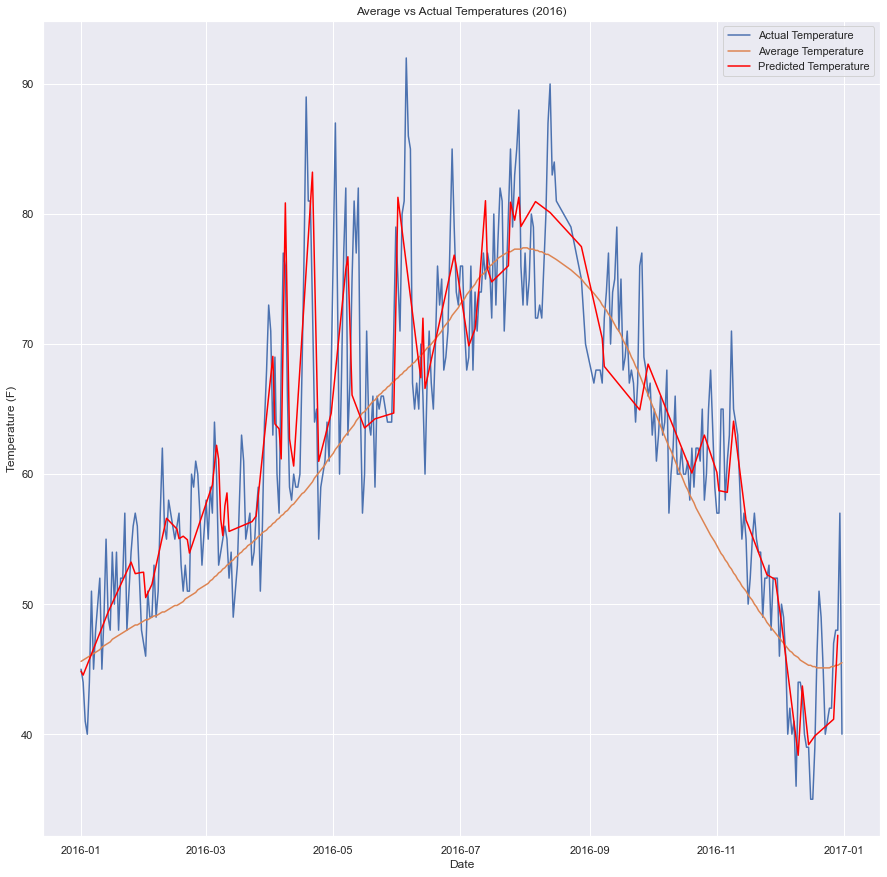

In [19]:
years_t = test_data[:, features.index('year')]
months_t = test_data[:, features.index('month')]
days_t = test_data[:, features.index('day')]
dates_t = [datetime.strptime([str(f'{int(years_t[i])}/{int(months_t[i])}/{int(days_t[i])}') for i in range(test_data.shape[0])][n], '%Y/%m/%d') for n in range(test_data.shape[0])]

acc_df = pd.DataFrame({'date': dates, 'actual': targets})
preds_df = pd.DataFrame({'date': dates_t, 'prediction': predictions})

fig, ax = plt.subplots()
date_acc = sns.lineplot(x='date', y='actual', data=acc_df, ax=ax)
date_avgtemp = sns.lineplot(dates, average_temps, ax=ax)
date_pred = sns.lineplot(x='date', y='prediction', data=preds_df, ax=ax, linewidth=1.5, color='red')
date_pred.set(xlabel='Date', ylabel='Temperature (F)', title='Average vs Actual Temperatures (2016)')
ax.legend(('Actual Temperature', 'Average Temperature', 'Predicted Temperature'))
plt.show()